In [14]:
# Collab install dependencies

!pip install --upgrade music21

!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore

!apt-get install xvfb

Repository: 'deb https://ppa.launchpadcontent.net/mscore-ubuntu/mscore-stable/ubuntu/ jammy main'
Description:
~~~~~~~~~ MUSESCORE 2 RELEASES FOR UBUNTU 12.04 AND LATER ~~~~~~~~~
Note that Canonical doesn’t allow new builds for releases marked obsolete
(any nōn-LTS predating the previous LTS (currently 24.04 “noble”), and any LTS
older than 7 years, currently anything before 14.04 “trusty”). The packages
for those older releases here can no longer be updated but still work, within
limitations. Best to upgrade to a supported release of the operating system!

INSTALLING: (run these commands from the terminal)
  sudo add-apt-repository ppa:mscore-ubuntu/mscore-stable
  sudo apt-get update
  sudo apt-get install musescore

DO *NOT* USE THESE PPAs on Debian, only on Ubuntu!

‣‣‣ These packages are NOT suitable for ”KDE neon 18.04 (bionic)”!
‣ Use https://build.opensuse.org/project/show/home:mirabile:mscore instead.
⚠ KDE neon 18.04 was discontinued so those packages can no longer be updated

In [15]:
# Import Music21

from music21 import *

# Set Paths for musescore 2
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

In [16]:
#
# Note dictionaries
# Convert numbers to notes
#

# Chromatic Notes
notes_dict = {
  "0" : note.Note('C5'),
  "1" : note.Note('C#5'),
  "2" : note.Note('D5'),
  "3" : note.Note('Eb5'),
  "4" : note.Note('E5'),
  "5" : note.Note('F5'),
  "6" : note.Note('F#5'),
  "7" : note.Note('G5'),
  "8" : note.Note('Ab5'),
  "9" : note.Note('A5'),
  "10" : note.Note('Bb5'),
  "11" : note.Note('B5'),
}

# Chromatic Letters
letters = {
  "0" : "C4",
  "1" : "C#4",
  "2" : "D4",
  "3" : "Eb4",
  "4" : "E4",
  "5" : "F4",
  "6" : "F#4",
  "7" : "G4",
  "8" : "Ab4",
  "9" : "A4",
  "10" : "Bb4",
  "11" : "B4",
}

# Diatonic Letters
diatonic_letters = {
  "0" : "C4",
  "1" : "D4",
  "2" : "E4",
  "3" : "F4",
  "4" : "G4",
  "5" : "A4",
  "6" : "B4",
  "7" : "C5",
  "8" : "D5",
  "9" : "E5",
  "10" : "F5",
  "11" : "G5",
}

# Diatonic Letters BASS 8vb
diatonic_bass_letters = {
  "0" : "C3",
  "1" : "D3",
  "2" : "E3",
  "3" : "F3",
  "4" : "G3",
  "5" : "A3",
  "6" : "B3",
  "7" : "C4",
  "8" : "D4",
  "9" : "E4",
  "10" : "F4",
  "11" : "G4",
}


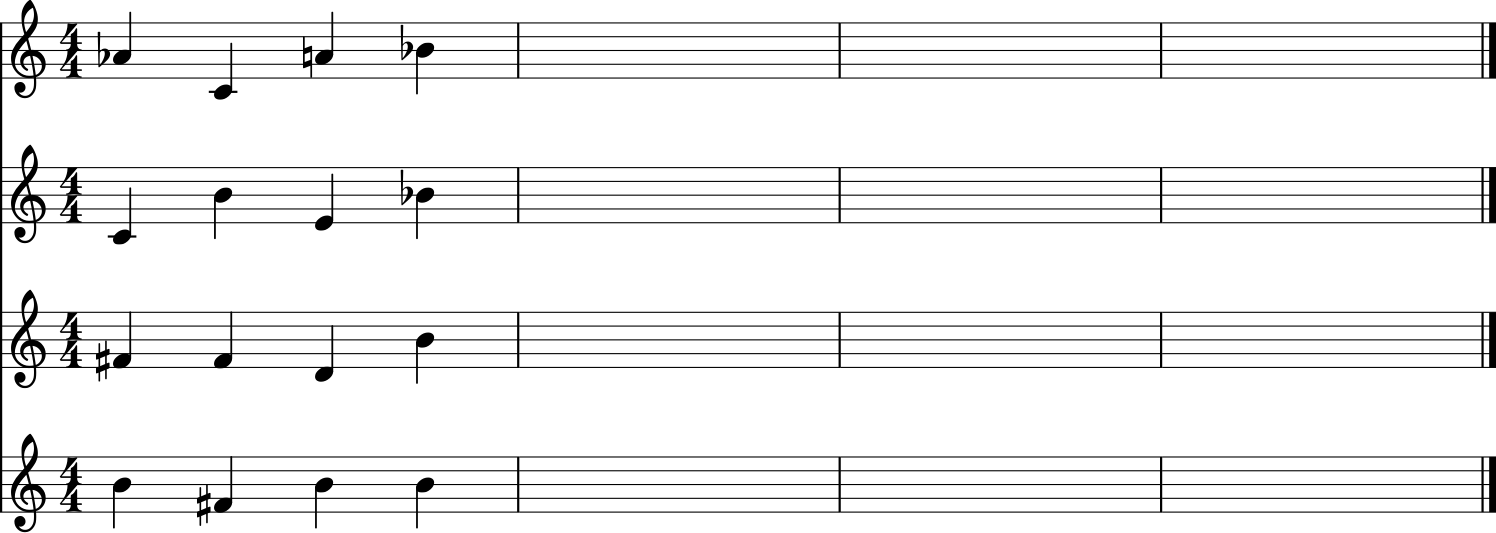

In [17]:
#
# Chromatic Score Conversion
#
# Hardcoded input array
#


#alloyinput = \
#"this/Note<:s={Note$0->8, Note$1->0, Note$2->9, Note$3->10}\n\
#this/Note<:a={Note$0->0, Note$1->11, Note$2->4, Note$3->10}\n\
#this/Note<:t={Note$0->6, Note$1->6, Note$2->2, Note$3->11}\n\
#this/Note<:b={Note$0->11, Note$1->6, Note$2->11, Note$3->11}"

alloys = ["8","0","9","10"]
alloya = ["0","11","4","10"]
alloyt = ["6","6","2","11"]
alloyb = ["11","6","11","11"]

# Create a score
score = stream.Score()

# Create four parts (streams)
s = stream.Part()
a = stream.Part()
t = stream.Part()
b = stream.Part()

# Add notes to the soprano part
s.append(note.Note(letters.get(alloys[0]), quarterLength=1))
s.append(note.Note(letters.get(alloys[1]), quarterLength=1))
s.append(note.Note(letters.get(alloys[2]), quarterLength=1))
s.append(note.Note(letters.get(alloys[3]), quarterLength=1))

# Add notes to the alto part
a.append(note.Note(letters.get(alloya[0]), quarterLength=1))
a.append(note.Note(letters.get(alloya[1]), quarterLength=1))
a.append(note.Note(letters.get(alloya[2]), quarterLength=1))
a.append(note.Note(letters.get(alloya[3]), quarterLength=1))

# Add notes to the tenor part
t.append(note.Note(letters.get(alloyt[0]), quarterLength=1))
t.append(note.Note(letters.get(alloyt[1]), quarterLength=1))
t.append(note.Note(letters.get(alloyt[2]), quarterLength=1))
t.append(note.Note(letters.get(alloyt[3]), quarterLength=1))

# Add notes to the bass part
b.append(note.Note(letters.get(alloyb[0]), quarterLength=1))
b.append(note.Note(letters.get(alloyb[1]), quarterLength=1))
b.append(note.Note(letters.get(alloyb[2]), quarterLength=1))
b.append(note.Note(letters.get(alloyb[3]), quarterLength=1))


# Add parts to the score
score.append(s)
score.append(a)
score.append(t)
score.append(b)

# Show the score
score.show()
score.show('midi')

In [18]:
#
# Gets the Notes for a single Part from Alloy String
#
def extract_notes(notes_string : str) -> list[str]:
  '''
  Extracts the notes from the Alloy output string

  Parameters:
    notes_string (str) : A string of the alloy input string for a single part

  Returns:
    list[str] : A list of note strings
  '''
  notes_string = notes_string.split(" ")
  notes_arr = []
  for s in notes_string:
    s = s.split("->")[1]
    s = s.strip("}")
    s = s.strip(",")
    notes_arr.append(s)
  return notes_arr

#
# Split the Alloy Input String into parts
# Calls Extract Notes for each part
# Returns A List of Notes for each part
#
def create_parts(alloy_input):
  alloy_input_str = alloy_input.split("\n")

  alloy_input_s = alloy_input_str[0]
  alloy_input_a = alloy_input_str[1]
  alloy_input_t = alloy_input_str[2]
  alloy_input_b = alloy_input_str[3]

  # Extract the notes for each part
  s_notes = extract_notes(alloy_input_s)
  a_notes = extract_notes(alloy_input_a)
  t_notes = extract_notes(alloy_input_t)
  b_notes = extract_notes(alloy_input_b)

  parts = []
  parts.append(s_notes)
  parts.append(a_notes)
  parts.append(t_notes)
  parts.append(b_notes)

  return parts


#
# Gets the Notes for a single Part from ChatGPT String
#
def extract_notes_gpt(notes_string : str) -> list[str]:
  '''
  Extracts the notes from the ChatGPT output string

  Parameters:
    notes_string (str) : A string of the alloy input string for a single part

  Returns:
    list[str] : A list of note strings
  '''
  print(notes_string)
  notes_string = notes_string[notes_string.index(":")+2:]
  notes_string = notes_string.split(" - ")
  notes_arr = []

  for s in notes_string:
    print(s)
    notes_arr.append(s)

  return notes_arr

#
# Split the GPT Input String into parts
# Calls Extract Notes for each part
# Returns A List of Notes for each part
#
def create_parts_gpt(gpt_input):
  gpt_input_str = gpt_input.split("\n")

  gpt_input_s = gpt_input_str[0]
  gpt_input_a = gpt_input_str[1]
  gpt_input_t = gpt_input_str[2]
  gpt_input_b = gpt_input_str[3]

  # Extract the notes for each part
  s_notes = extract_notes_gpt(gpt_input_s)
  a_notes = extract_notes_gpt(gpt_input_a)
  t_notes = extract_notes_gpt(gpt_input_t)
  b_notes = extract_notes_gpt(gpt_input_b)

  parts = []
  parts.append(s_notes)
  parts.append(a_notes)
  parts.append(t_notes)
  parts.append(b_notes)

  return parts

In [19]:
#
# Alloy Data Input
# Add all Alloy Generated Strings to a list
# We can then Analyze each object in the list
#

alloy_inputs = []

# Generated Alloy instance
alloy_input = \
"#this/Note<:s={Note$0->8, Note$1->0, Note$2->9, Note$3->10}\n\
#this/Note<:a={Note$0->0, Note$1->11, Note$2->4, Note$3->10}\n\
#this/Note<:t={Note$0->6, Note$1->6, Note$2->2, Note$3->11}\n\
#this/Note<:b={Note$0->11, Note$1->6, Note$2->11, Note$3->11}"
alloy_inputs.append(alloy_input)

alloy_input = \
"this/Note<:s={Note$0->5, Note$1->7, Note$2->8, Note$3->7}\n\
this/Note<:a={Note$0->9, Note$1->5, Note$2->5, Note$3->5}\n\
this/Note<:t={Note$0->7, Note$1->9, Note$2->10, Note$3->9}\n\
this/Note<:b={Note$0->5, Note$1->5, Note$2->1, Note$3->5}"
alloy_inputs.append(alloy_input)

alloy_input = \
"this/Note<:s={Note$0->7, Note$1->8, Note$2->7, Note$3->8}\n\
this/Note<:a={Note$0->11, Note$1->6, Note$2->4, Note$3->6}\n\
this/Note<:t={Note$0->9, Note$1->10, Note$2->2, Note$3->10}\n\
this/Note<:b={Note$0->0, Note$1->6, Note$2->0, Note$3->6}"
alloy_inputs.append(alloy_input)

alloy_input = \
"this/Note<:s={Note$0->7, Note$1->9, Note$2->8, Note$3->7}\n\
this/Note<:a={Note$0->5, Note$1->6, Note$2->6, Note$3->4}\n\
this/Note<:t={Note$0->9, Note$1->11, Note$2->10, Note$3->2}\n\
this/Note<:b={Note$0->5, Note$1->2, Note$2->6, Note$3->0}"
alloy_inputs.append(alloy_input)

alloy_input = \
"this/Note<:s={Note$0->5, Note$1->7, Note$2->6, Note$3->7}\n\
this/Note<:a={Note$0->10, Note$1->11, Note$2->11, Note$3->11}\n\
this/Note<:t={Note$0->7, Note$1->9, Note$2->8, Note$3->9}\n\
this/Note<:b={Note$0->3, Note$1->0, Note$2->4, Note$3->0}"
alloy_inputs.append(alloy_input)

alloy_input = \
"this/Note<:s={Note$0->7, Note$1->5, Note$2->7, Note$3->6}\n\
this/Note<:a={Note$0->11, Note$1->10, Note$2->11, Note$3->11}\n\
this/Note<:t={Note$0->9, Note$1->7, Note$2->9, Note$3->8}\n\
this/Note<:b={Note$0->0, Note$1->3, Note$2->0, Note$3->4}"
alloy_inputs.append(alloy_input)


alloy_input = \
"this/Note<:s={Note$0->7, Note$1->5, Note$2->6, Note$3->5}\n\
this/Note<:a={Note$0->11, Note$1->10, Note$2->10, Note$3->10}\n\
this/Note<:t={Note$0->9, Note$1->7, Note$2->8, Note$3->7}\n\
this/Note<:b={Note$0->0, Note$1->3, Note$2->6, Note$3->3}"
alloy_inputs.append(alloy_input)


alloy_input = \
"this/Note<:s={Note$0->7, Note$1->4, Note$2->5, Note$3->10}\n\
this/Note<:a={Note$0->11, Note$1->9, Note$2->9, Note$3->8}\n\
this/Note<:t={Note$0->9, Note$1->6, Note$2->7, Note$3->5}\n\
this/Note<:b={Note$0->0, Note$1->2, Note$2->5, Note$3->1}"
alloy_inputs.append(alloy_input)



alloy_input = \
"this/Note<:s={Note$0->7, Note$1->6, Note$2->7, Note$3->11}\n\
this/Note<:a={Note$0->11, Note$1->11, Note$2->11, Note$3->9}\n\
this/Note<:t={Note$0->9, Note$1->8, Note$2->9, Note$3->6}\n\
this/Note<:b={Note$0->0, Note$1->4, Note$2->0, Note$3->2}"
alloy_inputs.append(alloy_input)


alloy_input = \
"this/Note<:s={Note$0->8, Note$1->6, Note$2->9, Note$3->6}\n\
this/Note<:a={Note$0->5, Note$1->11, Note$2->6, Note$3->11}\n\
this/Note<:t={Note$0->3, Note$1->8, Note$2->11, Note$3->8}\n\
this/Note<:b={Note$0->1, Note$1->4, Note$2->2, Note$3->4}"
alloy_inputs.append(alloy_input)



alloy_input = \
"this/Note<:s={Note$0->7, Note$1->6, Note$2->9, Note$3->6}\n\
this/Note<:a={Note$0->11, Note$1->11, Note$2->6, Note$3->11}\n\
this/Note<:t={Note$0->9, Note$1->8, Note$2->4, Note$3->8}\n\
this/Note<:b={Note$0->0, Note$1->4, Note$2->2, Note$3->4}"
alloy_inputs.append(alloy_input)


alloy_input = \
"this/Note<:s={Note$0->6, Note$1->7, Note$2->8, Note$3->7}\n\
this/Note<:a={Note$0->11, Note$1->11, Note$2->6, Note$3->11}\n\
this/Note<:t={Note$0->8, Note$1->9, Note$2->10, Note$3->9}\n\
this/Note<:b={Note$0->4, Note$1->0, Note$2->6, Note$3->0}"
alloy_inputs.append(alloy_input)


alloy_input = \
"this/Note<:s={Note$0->7, Note$1->6, Note$2->7, Note$3->8}\n\
this/Note<:a={Note$0->11, Note$1->11, Note$2->11, Note$3->6}\n\
this/Note<:t={Note$0->9, Note$1->8, Note$2->9, Note$3->10}\n\
this/Note<:b={Note$0->0, Note$1->4, Note$2->0, Note$3->6}"
alloy_inputs.append(alloy_input)


alloy_input = \
"this/Note<:s={Note$0->11, Note$1->7, Note$2->6, Note$3->11}\n\
this/Note<:a={Note$0->9, Note$1->11, Note$2->11, Note$3->8}\n\
this/Note<:t={Note$0->6, Note$1->9, Note$2->8, Note$3->6}\n\
this/Note<:b={Note$0->2, Note$1->0, Note$2->4, Note$3->4}"
alloy_inputs.append(alloy_input)

alloy_input = \
"this/Note<:s={Note$0->11, Note$1->6, Note$2->7, Note$3->11}\n\
this/Note<:a={Note$0->8, Note$1->11, Note$2->11, Note$3->9}\n\
this/Note<:t={Note$0->6, Note$1->8, Note$2->9, Note$3->6}\n\
this/Note<:b={Note$0->4, Note$1->4, Note$2->0, Note$3->2}"
alloy_inputs.append(alloy_input)


alloy_input = \
"this/Note<:s={Note$0->7, Note$1->6, Note$2->5, Note$3->6}\n\
this/Note<:a={Note$0->11, Note$1->11, Note$2->9, Note$3->11}\n\
this/Note<:t={Note$0->9, Note$1->8, Note$2->7, Note$3->8}\n\
this/Note<:b={Note$0->0, Note$1->4, Note$2->5, Note$3->4}"
alloy_inputs.append(alloy_input)



print(len(alloy_inputs))


16


In [20]:
#
# GPT Data Input
# Add all GPT Generated Strings to a list
# We can then Analyze each object in the list
#

gpt_inputs = []

# Generated GPT instance
gpt_input = \
"Soprano: C4 - D4 - E4 - F4\n\
Alto: A3 - B3 - C4 - D4\n\
Tenor: E3 - F3 - G3 - A3\n\
Bass: C3 - D3 - E3 - F3"
gpt_inputs.append(gpt_input)

gpt_input = \
"Soprano: C4 - D4 - C4 - A3\n\
Alto: E4 - B3 - C4 - A3\n\
Tenor: G3 - G3 - A3 - F3\n\
Bass: C3 - G2 - A2 - F2"
gpt_inputs.append(gpt_input)

gpt_input = \
"Soprano: E4 - F4 - G4 - C4\n\
Alto: C4 - A3 - B3 - E4\n\
Tenor: G3 - F3 - D4 - G3\n\
Bass: C3 - F2 - G2 - C3"
gpt_inputs.append(gpt_input)

gpt_input = \
"Soprano: E4 - F4 - D4 - C4\n\
Alto: C4 - D4 - B3 - E4\n\
Tenor: G3 - A3 - G3 - G3\n\
Bass: C3 - D3 - G2 - C3"
gpt_inputs.append(gpt_input)

gpt_input = \
"Soprano: C4 - C4 - A3 - B3\n\
Alto: E4 - C4 - A3 - D4\n\
Tenor: G3 - A3 - F3 - G3\n\
Bass: C3 - A2 - F2 - G2"
gpt_inputs.append(gpt_input)

gpt_input = \
"Soprano: C4 - B3 - C4 - G4\n\
Alto: E4 - D4 - C4 - G3\n\
Tenor: G3 - G3 - A3 - B3\n\
Bass: C3 - G2 - A2 - E2"
gpt_inputs.append(gpt_input)

#print(create_parts_gpt(gpt_inputs[0]))
print(len(alloy_inputs))


16


In [21]:
#
# Chromatic Score
# Notes are already extracted from Alloy Strings
#

# Create a chromatic score
def create_score_chromatic(parts):
  score1 = stream.Score()

  # Create four parts (streams)
  s = stream.Part()
  a = stream.Part()
  t = stream.Part()
  b = stream.Part()

  # Get notes for each part
  s_notes = parts[0]
  a_notes = parts[1]
  t_notes = parts[2]
  b_notes = parts[3]

  # Add notes to the soprano part
  s.append(note.Note(letters.get(s_notes[0]), quarterLength=1))
  s.append(note.Note(letters.get(s_notes[1]), quarterLength=1))
  s.append(note.Note(letters.get(s_notes[2]), quarterLength=1))
  s.append(note.Note(letters.get(s_notes[3]), quarterLength=1))

  # Add notes to the alto part
  a.append(note.Note(letters.get(a_notes[0]), quarterLength=1))
  a.append(note.Note(letters.get(a_notes[1]), quarterLength=1))
  a.append(note.Note(letters.get(a_notes[2]), quarterLength=1))
  a.append(note.Note(letters.get(a_notes[3]), quarterLength=1))

  # Add notes to the tenor part
  t.append(note.Note(letters.get(t_notes[0]), quarterLength=1))
  t.append(note.Note(letters.get(t_notes[1]), quarterLength=1))
  t.append(note.Note(letters.get(t_notes[2]), quarterLength=1))
  t.append(note.Note(letters.get(t_notes[3]), quarterLength=1))

  # Add notes to the bass part
  b.append(note.Note(letters.get(b_notes[0]), quarterLength=1))
  b.append(note.Note(letters.get(b_notes[1]), quarterLength=1))
  b.append(note.Note(letters.get(b_notes[2]), quarterLength=1))
  b.append(note.Note(letters.get(b_notes[3]), quarterLength=1))


  # Add parts to the score
  score1.append(s)
  score1.append(a)
  score1.append(t)
  score1.append(b)

  return score1

# Create a DIATONIC score
def create_score(parts):
  score1 = stream.Score()

  # Create four parts (streams)
  s = stream.Part()
  a = stream.Part()
  t = stream.Part()
  b = stream.Part()

  # Get notes for each part
  s_notes = parts[0]
  a_notes = parts[1]
  t_notes = parts[2]
  b_notes = parts[3]

  # Add notes to the soprano part
  s.append(note.Note(diatonic_letters.get(s_notes[0]), quarterLength=1))
  s.append(note.Note(diatonic_letters.get(s_notes[1]), quarterLength=1))
  s.append(note.Note(diatonic_letters.get(s_notes[2]), quarterLength=1))
  s.append(note.Note(diatonic_letters.get(s_notes[3]), quarterLength=1))

  # Add notes to the alto part
  a.append(note.Note(diatonic_letters.get(a_notes[0]), quarterLength=1))
  a.append(note.Note(diatonic_letters.get(a_notes[1]), quarterLength=1))
  a.append(note.Note(diatonic_letters.get(a_notes[2]), quarterLength=1))
  a.append(note.Note(diatonic_letters.get(a_notes[3]), quarterLength=1))

  # Add notes to the tenor part
  t.append(note.Note(diatonic_letters.get(t_notes[0]), quarterLength=1))
  t.append(note.Note(diatonic_letters.get(t_notes[1]), quarterLength=1))
  t.append(note.Note(diatonic_letters.get(t_notes[2]), quarterLength=1))
  t.append(note.Note(diatonic_letters.get(t_notes[3]), quarterLength=1))

  # Add notes to the bass part
  b.append(note.Note(diatonic_bass_letters.get(b_notes[0]), quarterLength=1))
  b.append(note.Note(diatonic_bass_letters.get(b_notes[1]), quarterLength=1))
  b.append(note.Note(diatonic_bass_letters.get(b_notes[2]), quarterLength=1))
  b.append(note.Note(diatonic_bass_letters.get(b_notes[3]), quarterLength=1))


  # Add parts to the score
  score1.append(s)
  score1.append(a)
  score1.append(t)
  score1.append(b)

  return score1


# Create a DIATONIC score from GPT inputs
def create_score_gpt(parts):
  score1 = stream.Score()

  # Create four parts (streams)
  s = stream.Part()
  a = stream.Part()
  t = stream.Part()
  b = stream.Part()

  # Get notes for each part
  s_notes = parts[0]
  a_notes = parts[1]
  t_notes = parts[2]
  b_notes = parts[3]

  # Add notes to the soprano part
  s.append(note.Note((s_notes[0]), quarterLength=1))
  s.append(note.Note((s_notes[1]), quarterLength=1))
  s.append(note.Note((s_notes[2]), quarterLength=1))
  s.append(note.Note((s_notes[3]), quarterLength=1))

  # Add notes to the alto part
  a.append(note.Note((a_notes[0]), quarterLength=1))
  a.append(note.Note((a_notes[1]), quarterLength=1))
  a.append(note.Note((a_notes[2]), quarterLength=1))
  a.append(note.Note((a_notes[3]), quarterLength=1))

  # Add notes to the tenor part
  t.append(note.Note((t_notes[0]), quarterLength=1))
  t.append(note.Note((t_notes[1]), quarterLength=1))
  t.append(note.Note((t_notes[2]), quarterLength=1))
  t.append(note.Note((t_notes[3]), quarterLength=1))

  # Add notes to the bass part
  b.append(note.Note((b_notes[0]), quarterLength=1))
  b.append(note.Note((b_notes[1]), quarterLength=1))
  b.append(note.Note((b_notes[2]), quarterLength=1))
  b.append(note.Note((b_notes[3]), quarterLength=1))


  # Add parts to the score
  score1.append(s)
  score1.append(a)
  score1.append(t)
  score1.append(b)

  return score1

# Show the score
def show_score(s):
  s.show()
  s.show('midi')


In [22]:
#
# Parallel 5
#
def isP5 (ibn):
  if (ibn.name == "P5"):
    return True
  return False

def isPar5 (s1, s2):
  #assume s1 and s2 same length
  for i in range(1,len(s1)):
    if (isP5(interval.Interval(s1[i],s2[i])) and isP5(interval.Interval(s1[i-1],s2[i-1]))):
      return True
  return False

def isPar5Score(s,a,t,b):
  # Soprano
  if isPar5(s,a):
    return True
  if isPar5(s,t):
    return True
  if isPar5(s,b):
    return True
  # Alto
  if isPar5(a,t):
    return True
  if isPar5(a,b):
    return True
  # Tenor Bass
  if isPar5(t,b):
    return True

  return False

#
# Parallel 8
#
def isP8 (ibn):
  if (ibn.name == "P8"):
    return True
  return False

def isPar8 (s1, s2):
  #assume s1 and s2 same length
  for i in range(1,len(s1)):
    if (isP8(interval.Interval(s1[i],s2[i])) and isP8(interval.Interval(s1[i-1],s2[i-1]))):
      return True
  return False

def isPar8Score(s,a,t,b):
  # Soprano
  if isPar8(s,a):
    return True
  if isPar8(s,t):
    return True
  if isPar8(s,b):
    return True
  # Alto
  if isPar8(a,t):
    return True
  if isPar8(a,b):
    return True
  # Tenor Bass
  if isPar8(t,b):
    return True

  return False

#
# Print Score Details, Parts and Chords
#
def get_part_list(score1):
  sNotes = []
  aNotes = []
  tNotes = []
  bNotes = []

  parts = []
  parts.append(sNotes)
  parts.append(aNotes)
  parts.append(tNotes)
  parts.append(bNotes)

  index = 0
  for part in score1.parts:
    #print(part)
    n = part.getElementsByClass('Note')
    for i in n:
      #print(i)
      parts[index].append(i)
    index+=1

  return parts

def get_chords(parts):
  chords = []

  # Get notes for each part
  sNotes = parts[0]
  aNotes = parts[1]
  tNotes = parts[2]
  bNotes = parts[3]

  for i in range(len(sNotes)):
    chords.append(chord.Chord([sNotes[i], aNotes[i],tNotes[i],bNotes[i]]))

  return chords



def printScoreDetails(s):

  parts = get_part_list(s)

  # Print S A T B parts
  print(parts[0])
  print(parts[1])
  print(parts[2])
  print(parts[3])

  chords = get_chords(parts)

  for c in chords:
    c.show("text")
    print(roman.romanNumeralFromChord(c, key.Key('C')))

#
# Run Tests
#
def checkPar5(s):
  parts = get_part_list(s)
  if(isPar5Score(parts[0],parts[1],parts[2],parts[3])):
    print("PAR5: FAIL")
  else:
    print("PAR5: PASS")

def checkPar8(s):
  parts = get_part_list(s)
  if(isPar8Score(parts[0],parts[1],parts[2],parts[3])):
    print("PAR8: FAIL")
  else:
    print("PAR8: PASS")

def checkFPH(s):
  checkPar5(s)
  checkPar8(s)

In [23]:
#First Alloy instance
#i = alloy_inputs[0]
#parts0 = create_parts(i)
#score0 = create_score(parts0)
#printScoreDetails(score0)
#checkFPH(score0)
#show_score(score0)

#First ChatGPT instance
#i = gpt_inputs[0]
#parts0 = create_parts_gpt(i)
#score0 = create_score_gpt(parts0)
#printScoreDetails(score0)
#checkFPH(score0)
#show_score(score0)


[<music21.note.Note D>, <music21.note.Note C>, <music21.note.Note E>, <music21.note.Note F>]
[<music21.note.Note C>, <music21.note.Note G>, <music21.note.Note G>, <music21.note.Note F>]
[<music21.note.Note B>, <music21.note.Note B>, <music21.note.Note E>, <music21.note.Note G>]
[<music21.note.Note G>, <music21.note.Note B>, <music21.note.Note G>, <music21.note.Note G>]
<music21.chord.Chord D5 C4 B4 G4>
<music21.roman.RomanNumeral V752 in C major>
<music21.chord.Chord C4 G5 B4 B3>
<music21.roman.RomanNumeral i62 in C major>
<music21.chord.Chord E5 G4 E4 G4>
<music21.roman.RomanNumeral iii in C major>
<music21.chord.Chord F5 F5 G5 G4>
<music21.roman.RomanNumeral v7 in C major>
PAR5: PASS
PAR8: PASS


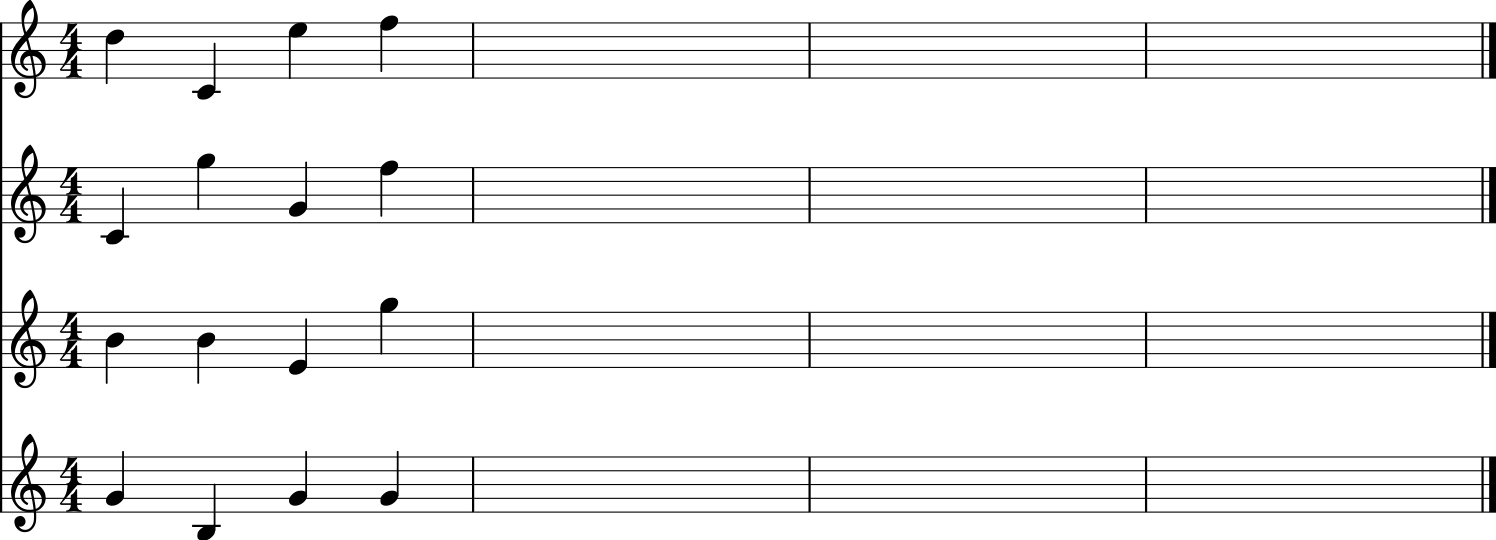

[<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note D>, <music21.note.Note C>]
[<music21.note.Note E>, <music21.note.Note A>, <music21.note.Note A>, <music21.note.Note A>]
[<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note F>, <music21.note.Note E>]
[<music21.note.Note A>, <music21.note.Note A>, <music21.note.Note D>, <music21.note.Note A>]
<music21.chord.Chord A4 E5 C5 A3>
<music21.roman.RomanNumeral vi in C major>
<music21.chord.Chord C5 A4 E5 A3>
<music21.roman.RomanNumeral vi in C major>
<music21.chord.Chord D5 A4 F5 D3>
<music21.roman.RomanNumeral ii in C major>
<music21.chord.Chord C5 A4 E5 A3>
<music21.roman.RomanNumeral vi in C major>
PAR5: PASS
PAR8: PASS


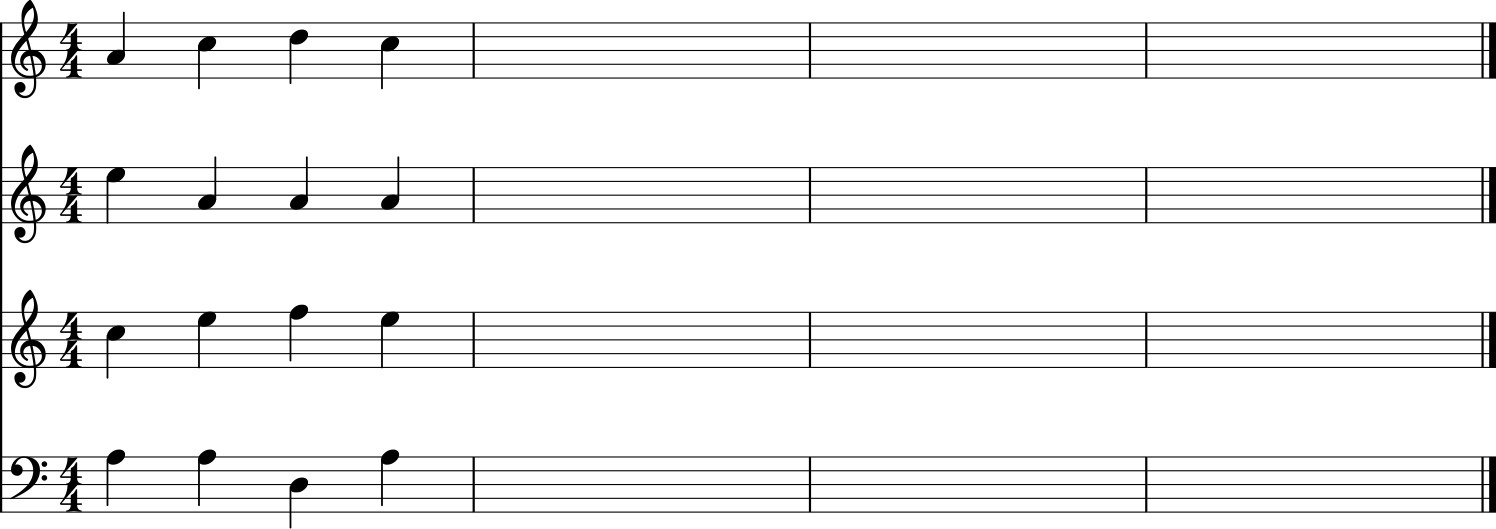

[<music21.note.Note C>, <music21.note.Note D>, <music21.note.Note C>, <music21.note.Note D>]
[<music21.note.Note G>, <music21.note.Note B>, <music21.note.Note G>, <music21.note.Note B>]
[<music21.note.Note E>, <music21.note.Note F>, <music21.note.Note E>, <music21.note.Note F>]
[<music21.note.Note C>, <music21.note.Note B>, <music21.note.Note C>, <music21.note.Note B>]
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord D5 B4 F5 B3>
<music21.roman.RomanNumeral viio in C major>
<music21.chord.Chord C5 G4 E4 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord D5 B4 F5 B3>
<music21.roman.RomanNumeral viio in C major>
PAR5: PASS
PAR8: PASS


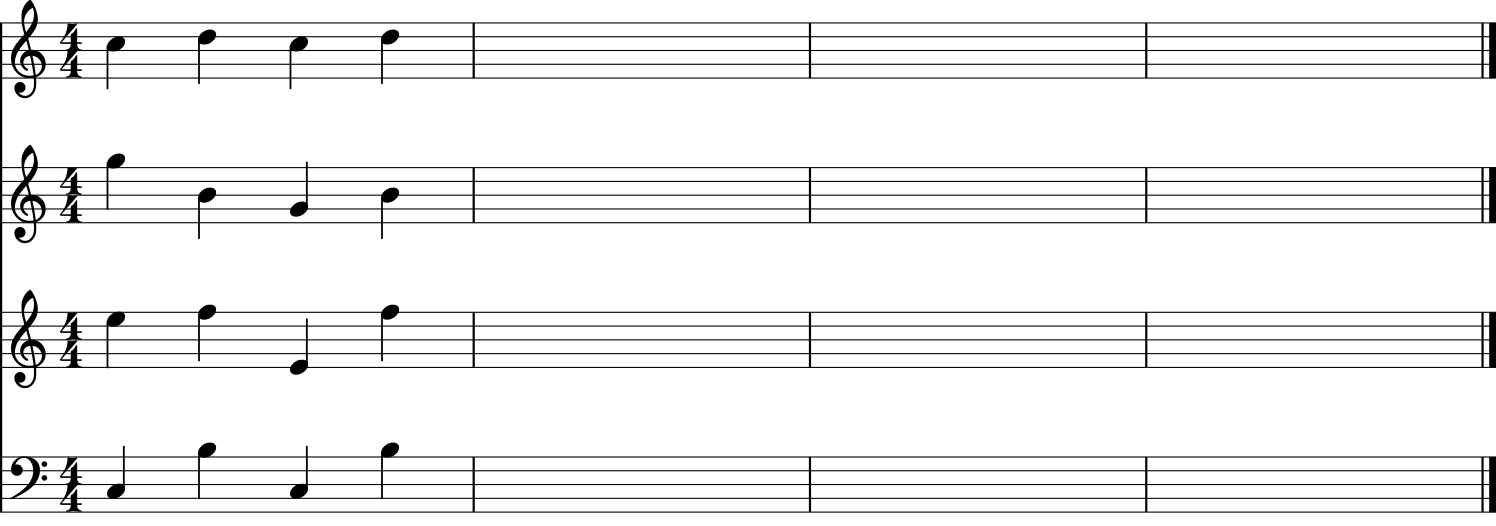

[<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note D>, <music21.note.Note C>]
[<music21.note.Note A>, <music21.note.Note B>, <music21.note.Note B>, <music21.note.Note G>]
[<music21.note.Note E>, <music21.note.Note G>, <music21.note.Note F>, <music21.note.Note E>]
[<music21.note.Note A>, <music21.note.Note E>, <music21.note.Note B>, <music21.note.Note C>]
<music21.chord.Chord C5 A4 E5 A3>
<music21.roman.RomanNumeral vi in C major>
<music21.chord.Chord E5 B4 G5 E3>
<music21.roman.RomanNumeral iii in C major>
<music21.chord.Chord D5 B4 F5 B3>
<music21.roman.RomanNumeral viio in C major>
<music21.chord.Chord C5 G4 E4 C3>
<music21.roman.RomanNumeral I in C major>
PAR5: PASS
PAR8: PASS


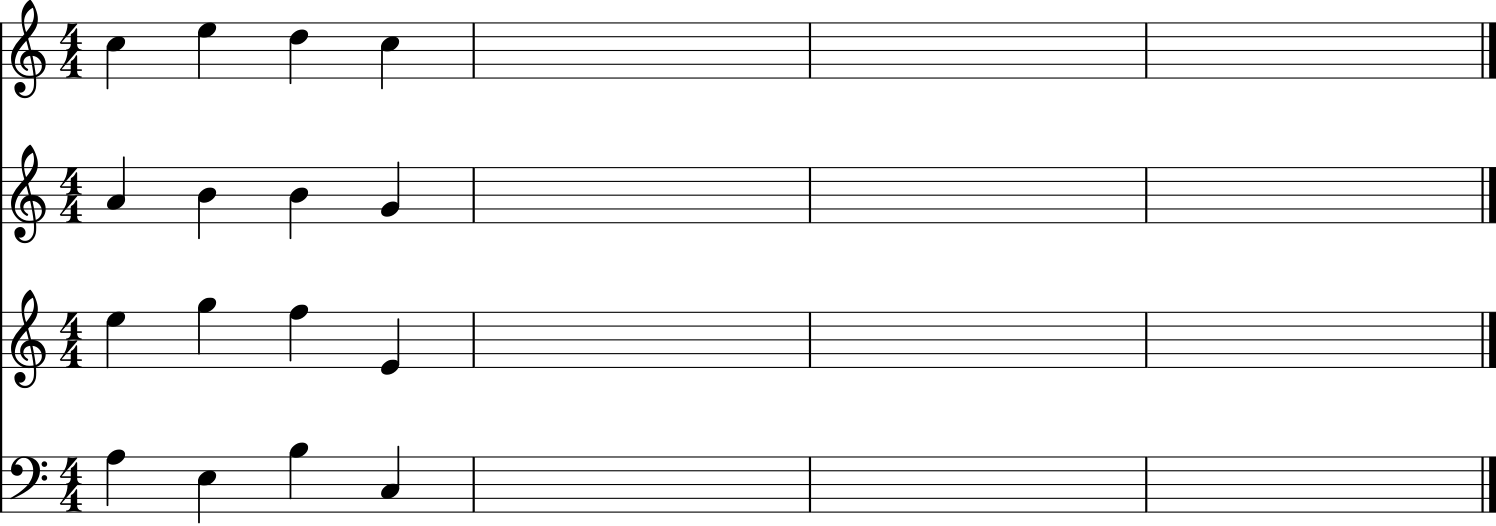

[<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note B>, <music21.note.Note C>]
[<music21.note.Note F>, <music21.note.Note G>, <music21.note.Note G>, <music21.note.Note G>]
[<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note D>, <music21.note.Note E>]
[<music21.note.Note F>, <music21.note.Note C>, <music21.note.Note G>, <music21.note.Note C>]
<music21.chord.Chord A4 F5 C5 F3>
<music21.roman.RomanNumeral IV in C major>
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord B4 G5 D5 G3>
<music21.roman.RomanNumeral V in C major>
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
PAR5: PASS
PAR8: PASS


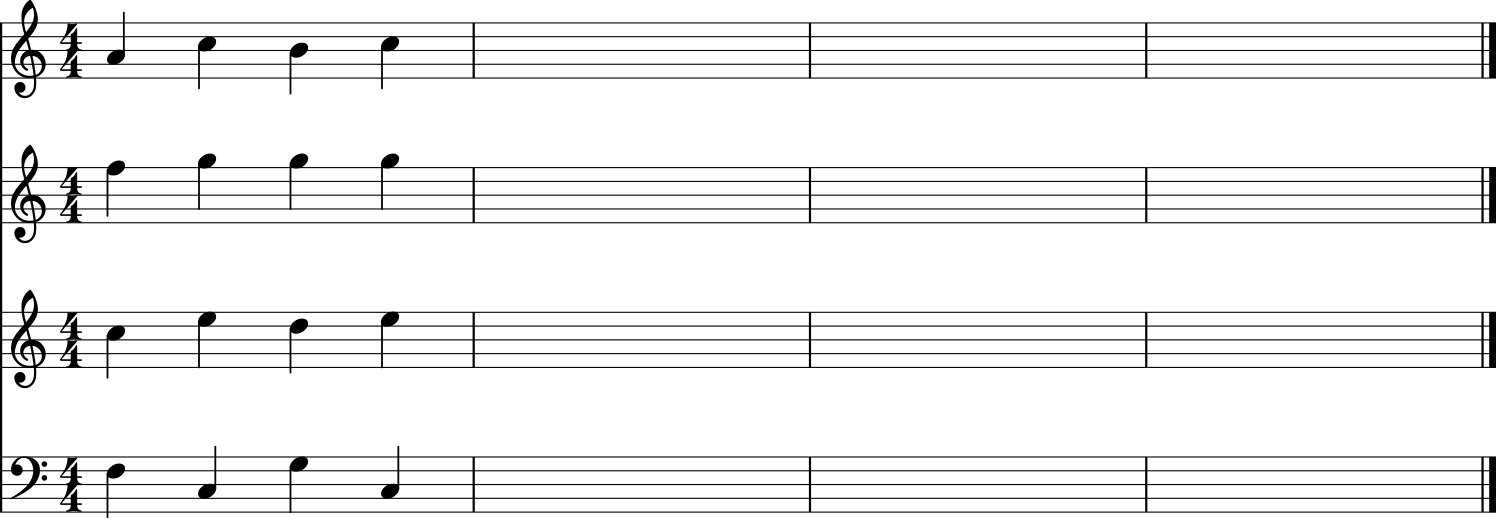

[<music21.note.Note C>, <music21.note.Note A>, <music21.note.Note C>, <music21.note.Note B>]
[<music21.note.Note G>, <music21.note.Note F>, <music21.note.Note G>, <music21.note.Note G>]
[<music21.note.Note E>, <music21.note.Note C>, <music21.note.Note E>, <music21.note.Note D>]
[<music21.note.Note C>, <music21.note.Note F>, <music21.note.Note C>, <music21.note.Note G>]
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord A4 F5 C5 F3>
<music21.roman.RomanNumeral IV in C major>
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord B4 G5 D5 G3>
<music21.roman.RomanNumeral V in C major>
PAR5: PASS
PAR8: PASS


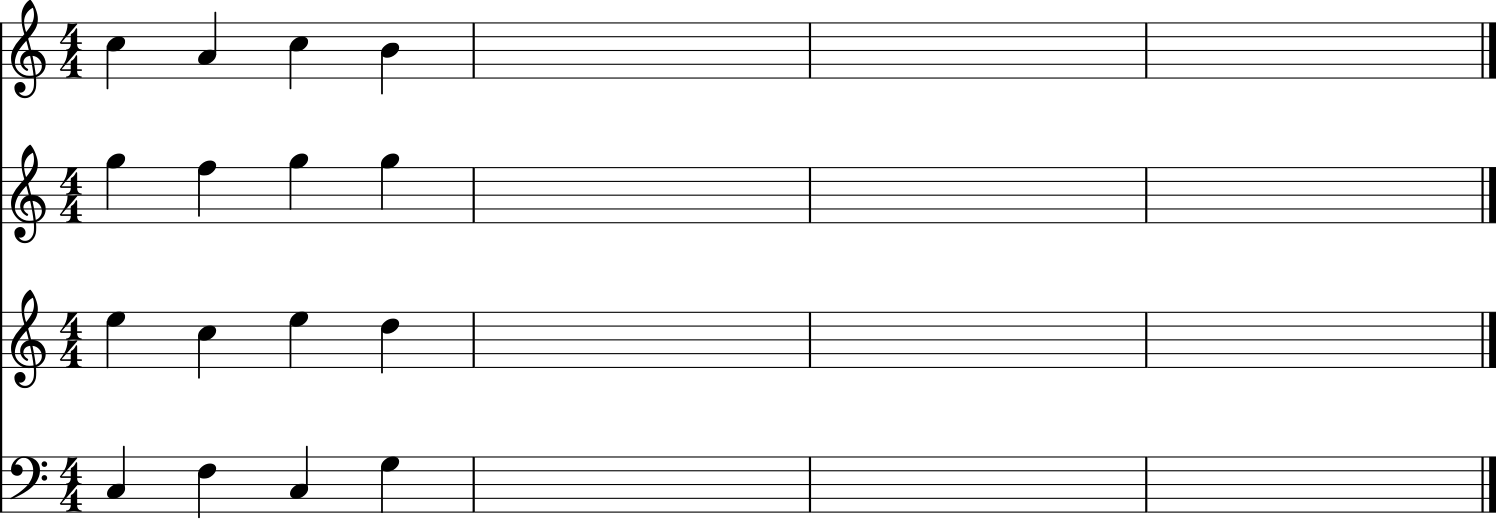

[<music21.note.Note C>, <music21.note.Note A>, <music21.note.Note B>, <music21.note.Note A>]
[<music21.note.Note G>, <music21.note.Note F>, <music21.note.Note F>, <music21.note.Note F>]
[<music21.note.Note E>, <music21.note.Note C>, <music21.note.Note D>, <music21.note.Note C>]
[<music21.note.Note C>, <music21.note.Note F>, <music21.note.Note B>, <music21.note.Note F>]
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord A4 F5 C5 F3>
<music21.roman.RomanNumeral IV in C major>
<music21.chord.Chord B4 F5 D5 B3>
<music21.roman.RomanNumeral viio in C major>
<music21.chord.Chord A4 F5 C5 F3>
<music21.roman.RomanNumeral IV in C major>
PAR5: PASS
PAR8: PASS


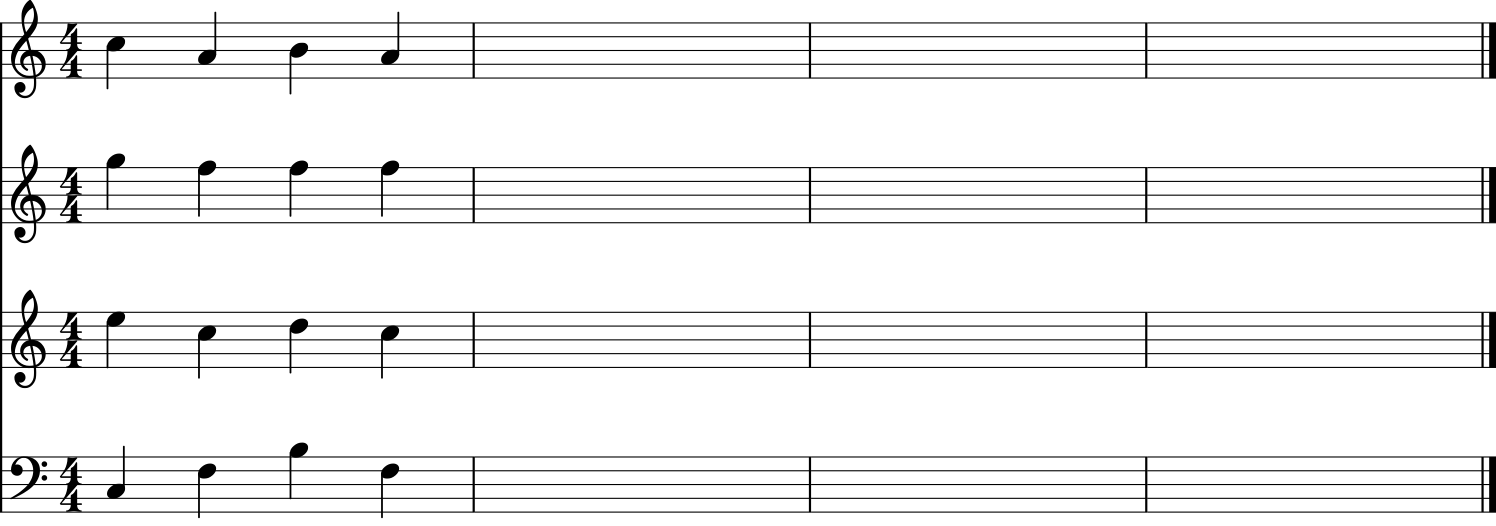

[<music21.note.Note C>, <music21.note.Note G>, <music21.note.Note A>, <music21.note.Note F>]
[<music21.note.Note G>, <music21.note.Note E>, <music21.note.Note E>, <music21.note.Note D>]
[<music21.note.Note E>, <music21.note.Note B>, <music21.note.Note C>, <music21.note.Note A>]
[<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note A>, <music21.note.Note D>]
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord G4 E5 B4 E3>
<music21.roman.RomanNumeral iii in C major>
<music21.chord.Chord A4 E5 C5 A3>
<music21.roman.RomanNumeral vi in C major>
<music21.chord.Chord F5 D5 A4 D3>
<music21.roman.RomanNumeral ii in C major>
PAR5: PASS
PAR8: PASS


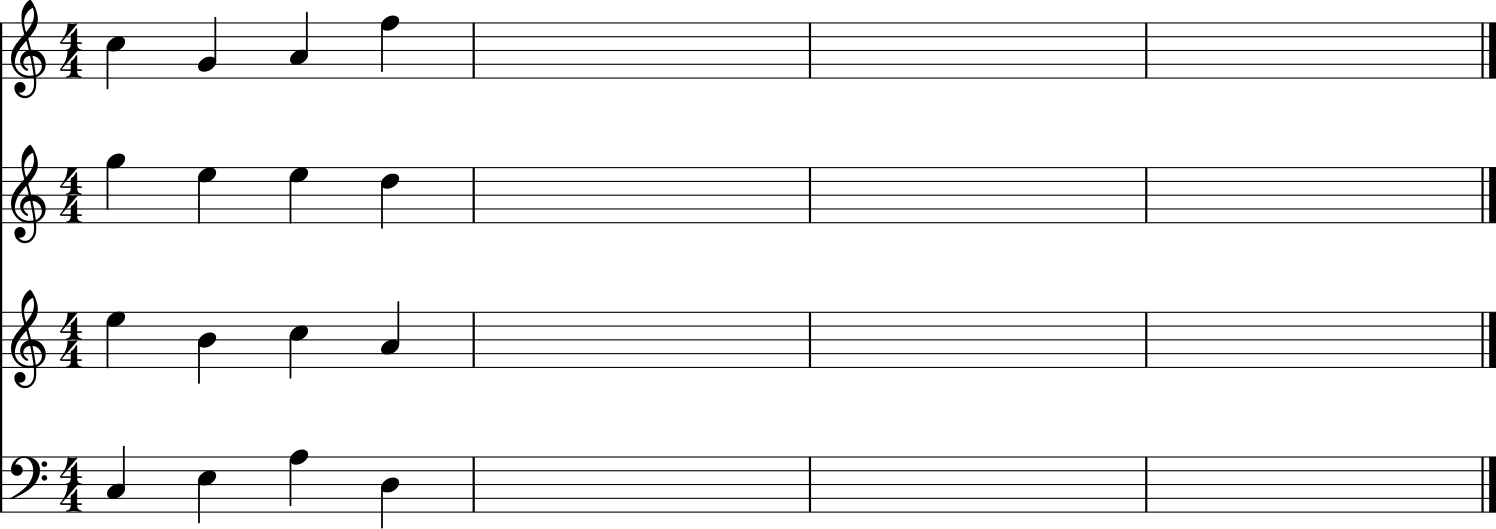

[<music21.note.Note C>, <music21.note.Note B>, <music21.note.Note C>, <music21.note.Note G>]
[<music21.note.Note G>, <music21.note.Note G>, <music21.note.Note G>, <music21.note.Note E>]
[<music21.note.Note E>, <music21.note.Note D>, <music21.note.Note E>, <music21.note.Note B>]
[<music21.note.Note C>, <music21.note.Note G>, <music21.note.Note C>, <music21.note.Note E>]
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord B4 G5 D5 G3>
<music21.roman.RomanNumeral V in C major>
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord G5 E5 B4 E3>
<music21.roman.RomanNumeral iii in C major>
PAR5: PASS
PAR8: PASS


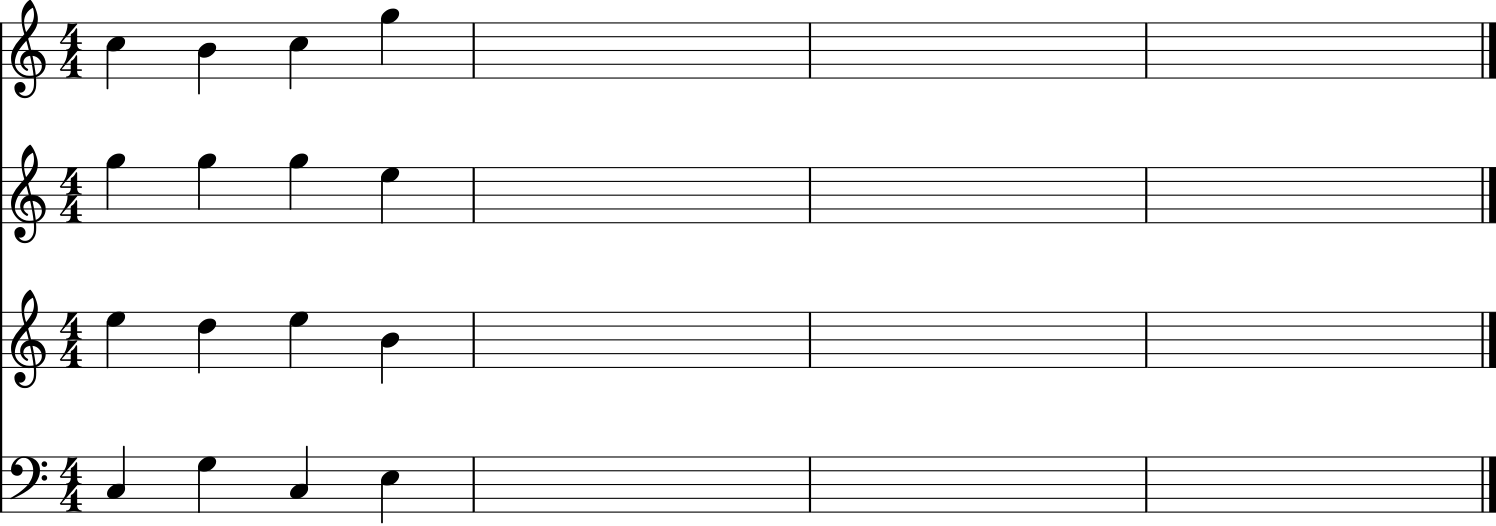

[<music21.note.Note D>, <music21.note.Note B>, <music21.note.Note E>, <music21.note.Note B>]
[<music21.note.Note A>, <music21.note.Note G>, <music21.note.Note B>, <music21.note.Note G>]
[<music21.note.Note F>, <music21.note.Note D>, <music21.note.Note G>, <music21.note.Note D>]
[<music21.note.Note D>, <music21.note.Note G>, <music21.note.Note E>, <music21.note.Note G>]
<music21.chord.Chord D5 A4 F4 D3>
<music21.roman.RomanNumeral ii in C major>
<music21.chord.Chord B4 G5 D5 G3>
<music21.roman.RomanNumeral V in C major>
<music21.chord.Chord E5 B4 G5 E3>
<music21.roman.RomanNumeral iii in C major>
<music21.chord.Chord B4 G5 D5 G3>
<music21.roman.RomanNumeral V in C major>
PAR5: PASS
PAR8: PASS


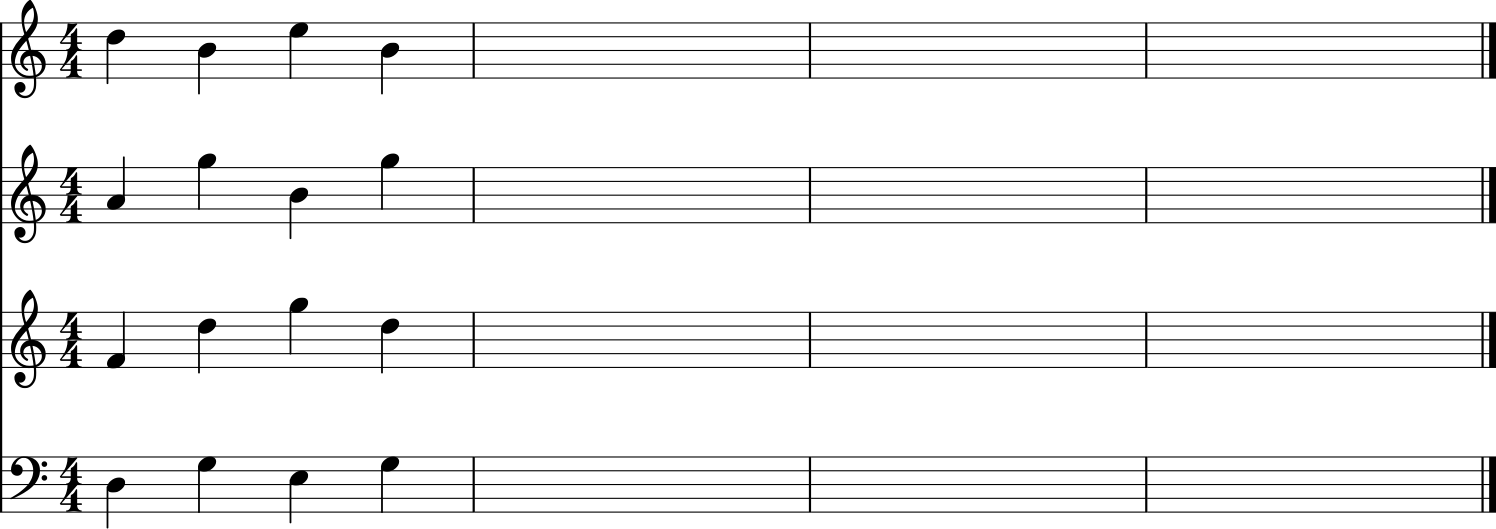

[<music21.note.Note C>, <music21.note.Note B>, <music21.note.Note E>, <music21.note.Note B>]
[<music21.note.Note G>, <music21.note.Note G>, <music21.note.Note B>, <music21.note.Note G>]
[<music21.note.Note E>, <music21.note.Note D>, <music21.note.Note G>, <music21.note.Note D>]
[<music21.note.Note C>, <music21.note.Note G>, <music21.note.Note E>, <music21.note.Note G>]
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord B4 G5 D5 G3>
<music21.roman.RomanNumeral V in C major>
<music21.chord.Chord E5 B4 G4 E3>
<music21.roman.RomanNumeral iii in C major>
<music21.chord.Chord B4 G5 D5 G3>
<music21.roman.RomanNumeral V in C major>
PAR5: PASS
PAR8: PASS


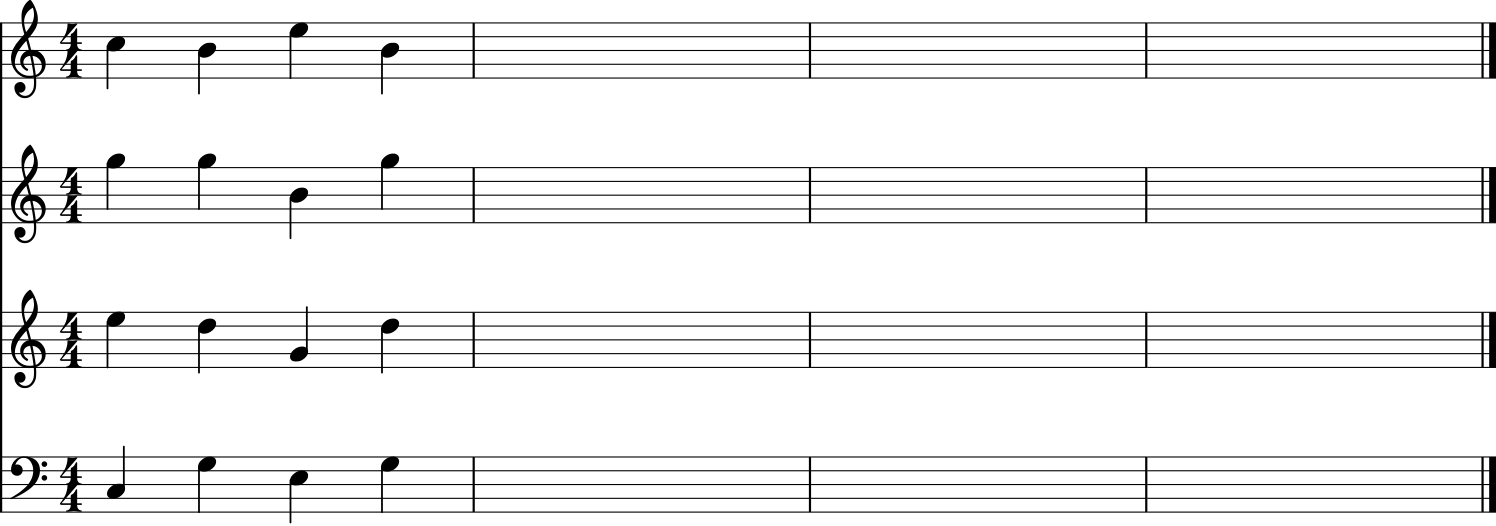

[<music21.note.Note B>, <music21.note.Note C>, <music21.note.Note D>, <music21.note.Note C>]
[<music21.note.Note G>, <music21.note.Note G>, <music21.note.Note B>, <music21.note.Note G>]
[<music21.note.Note D>, <music21.note.Note E>, <music21.note.Note F>, <music21.note.Note E>]
[<music21.note.Note G>, <music21.note.Note C>, <music21.note.Note B>, <music21.note.Note C>]
<music21.chord.Chord B4 G5 D5 G3>
<music21.roman.RomanNumeral V in C major>
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord D5 B4 F5 B3>
<music21.roman.RomanNumeral viio in C major>
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
PAR5: PASS
PAR8: PASS


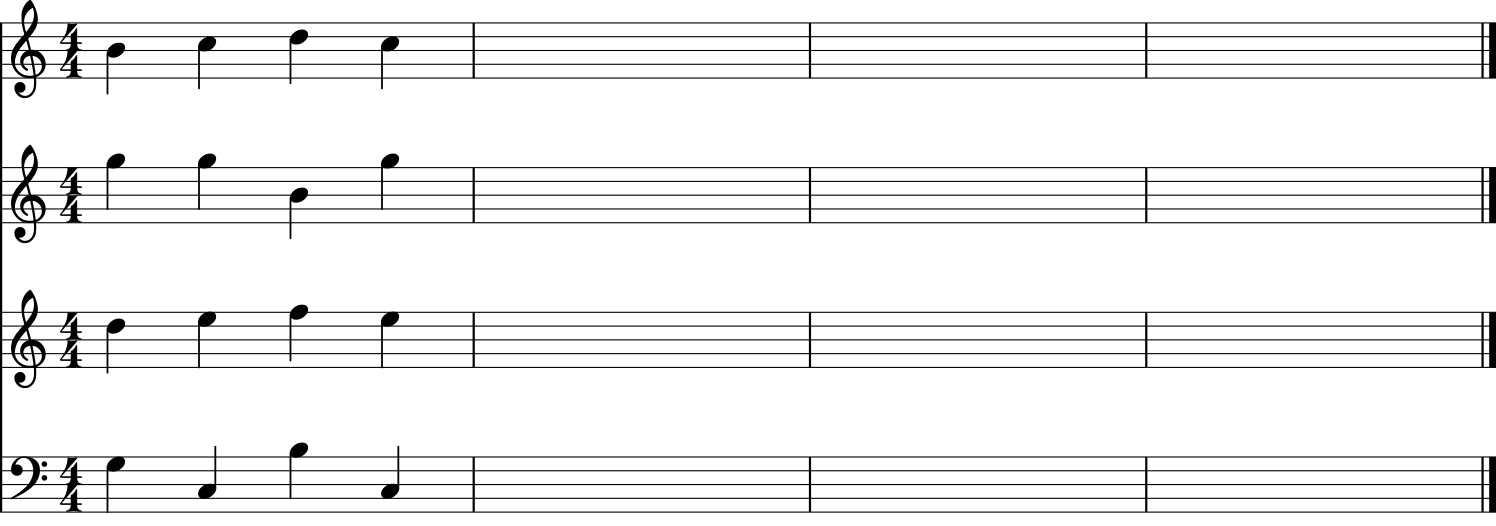

[<music21.note.Note C>, <music21.note.Note B>, <music21.note.Note C>, <music21.note.Note D>]
[<music21.note.Note G>, <music21.note.Note G>, <music21.note.Note G>, <music21.note.Note B>]
[<music21.note.Note E>, <music21.note.Note D>, <music21.note.Note E>, <music21.note.Note F>]
[<music21.note.Note C>, <music21.note.Note G>, <music21.note.Note C>, <music21.note.Note B>]
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord B4 G5 D5 G3>
<music21.roman.RomanNumeral V in C major>
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord D5 B4 F5 B3>
<music21.roman.RomanNumeral viio in C major>
PAR5: PASS
PAR8: PASS


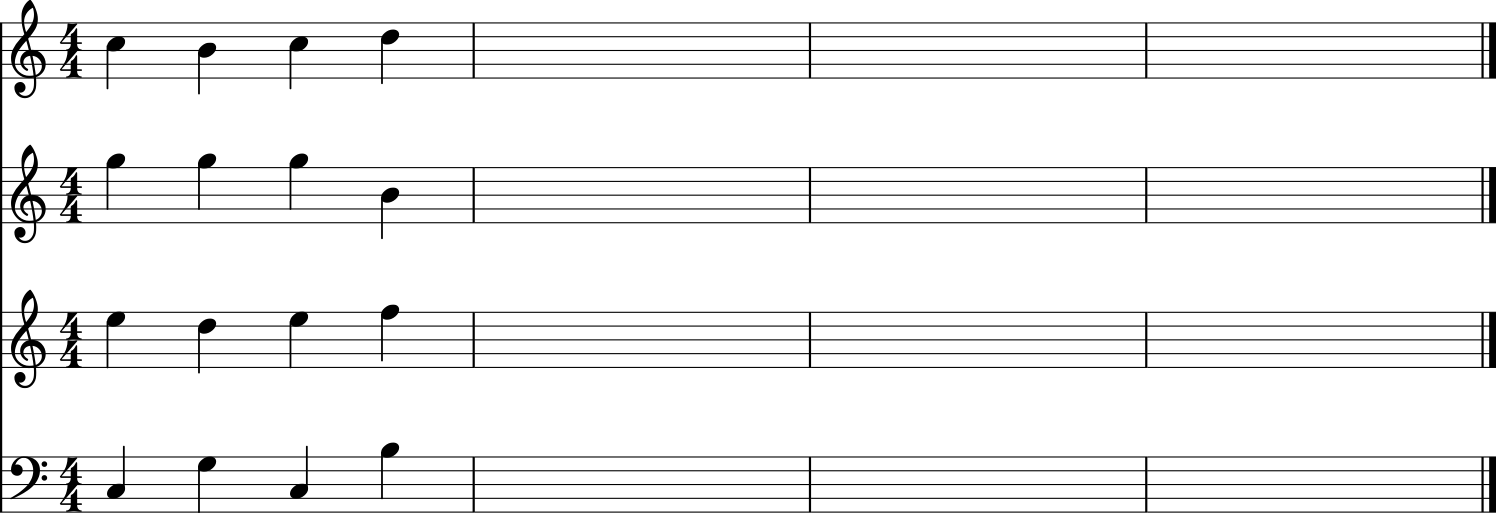

[<music21.note.Note G>, <music21.note.Note C>, <music21.note.Note B>, <music21.note.Note G>]
[<music21.note.Note E>, <music21.note.Note G>, <music21.note.Note G>, <music21.note.Note D>]
[<music21.note.Note B>, <music21.note.Note E>, <music21.note.Note D>, <music21.note.Note B>]
[<music21.note.Note E>, <music21.note.Note C>, <music21.note.Note G>, <music21.note.Note G>]
<music21.chord.Chord G5 E5 B4 E3>
<music21.roman.RomanNumeral iii in C major>
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord B4 G5 D5 G3>
<music21.roman.RomanNumeral V in C major>
<music21.chord.Chord G5 D5 B4 G3>
<music21.roman.RomanNumeral V in C major>
PAR5: PASS
PAR8: PASS


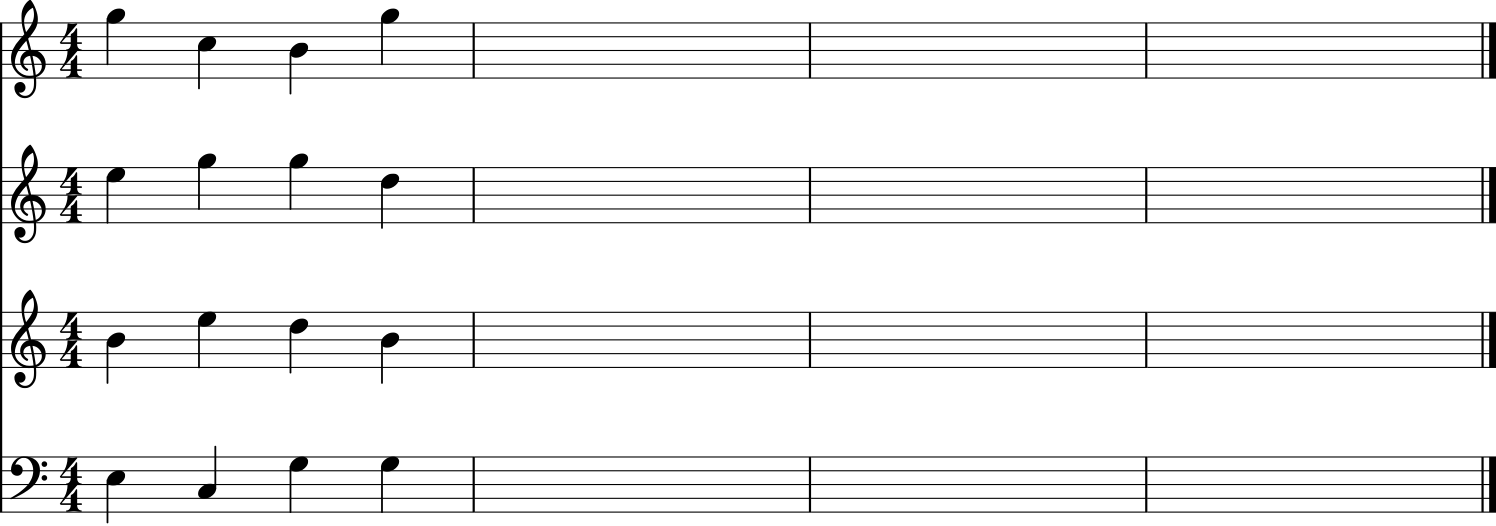

[<music21.note.Note G>, <music21.note.Note B>, <music21.note.Note C>, <music21.note.Note G>]
[<music21.note.Note D>, <music21.note.Note G>, <music21.note.Note G>, <music21.note.Note E>]
[<music21.note.Note B>, <music21.note.Note D>, <music21.note.Note E>, <music21.note.Note B>]
[<music21.note.Note G>, <music21.note.Note G>, <music21.note.Note C>, <music21.note.Note E>]
<music21.chord.Chord G5 D5 B4 G3>
<music21.roman.RomanNumeral V in C major>
<music21.chord.Chord B4 G5 D5 G3>
<music21.roman.RomanNumeral V in C major>
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord G5 E5 B4 E3>
<music21.roman.RomanNumeral iii in C major>
PAR5: PASS
PAR8: PASS


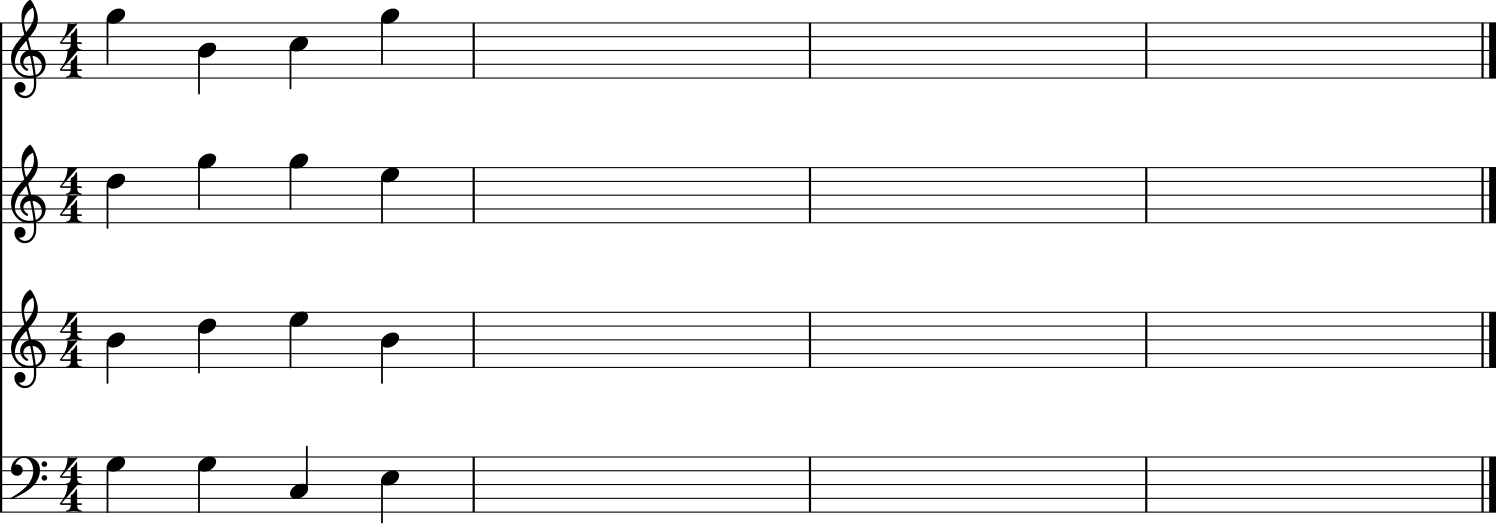

[<music21.note.Note C>, <music21.note.Note B>, <music21.note.Note A>, <music21.note.Note B>]
[<music21.note.Note G>, <music21.note.Note G>, <music21.note.Note E>, <music21.note.Note G>]
[<music21.note.Note E>, <music21.note.Note D>, <music21.note.Note C>, <music21.note.Note D>]
[<music21.note.Note C>, <music21.note.Note G>, <music21.note.Note A>, <music21.note.Note G>]
<music21.chord.Chord C5 G5 E5 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord B4 G5 D5 G3>
<music21.roman.RomanNumeral V in C major>
<music21.chord.Chord A4 E5 C5 A3>
<music21.roman.RomanNumeral vi in C major>
<music21.chord.Chord B4 G5 D5 G3>
<music21.roman.RomanNumeral V in C major>
PAR5: PASS
PAR8: PASS


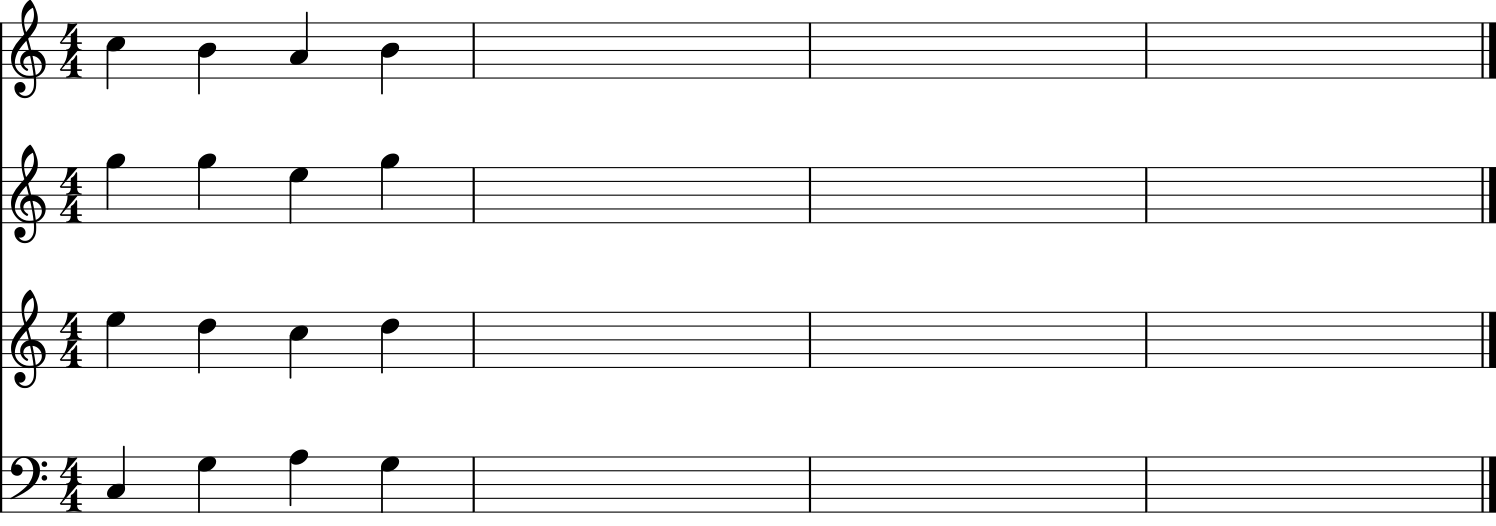

In [24]:
#
# Generate and Test all Alloy Inputs
#
for i in alloy_inputs:
  parts0 = create_parts(i)
  score0 = create_score(parts0)
  printScoreDetails(score0)
  checkFPH(score0)
  show_score(score0)


Soprano: C4 - D4 - E4 - F4
C4
D4
E4
F4
Alto: A3 - B3 - C4 - D4
A3
B3
C4
D4
Tenor: E3 - F3 - G3 - A3
E3
F3
G3
A3
Bass: C3 - D3 - E3 - F3
C3
D3
E3
F3
[<music21.note.Note C>, <music21.note.Note D>, <music21.note.Note E>, <music21.note.Note F>]
[<music21.note.Note A>, <music21.note.Note B>, <music21.note.Note C>, <music21.note.Note D>]
[<music21.note.Note E>, <music21.note.Note F>, <music21.note.Note G>, <music21.note.Note A>]
[<music21.note.Note C>, <music21.note.Note D>, <music21.note.Note E>, <music21.note.Note F>]
<music21.chord.Chord C4 A3 E3 C3>
<music21.roman.RomanNumeral vi6 in C major>
<music21.chord.Chord D4 B3 F3 D3>
<music21.roman.RomanNumeral viio6 in C major>
<music21.chord.Chord E4 C4 G3 E3>
<music21.roman.RomanNumeral I6 in C major>
<music21.chord.Chord F4 D4 A3 F3>
<music21.roman.RomanNumeral ii6 in C major>
PAR5: PASS
PAR8: FAIL


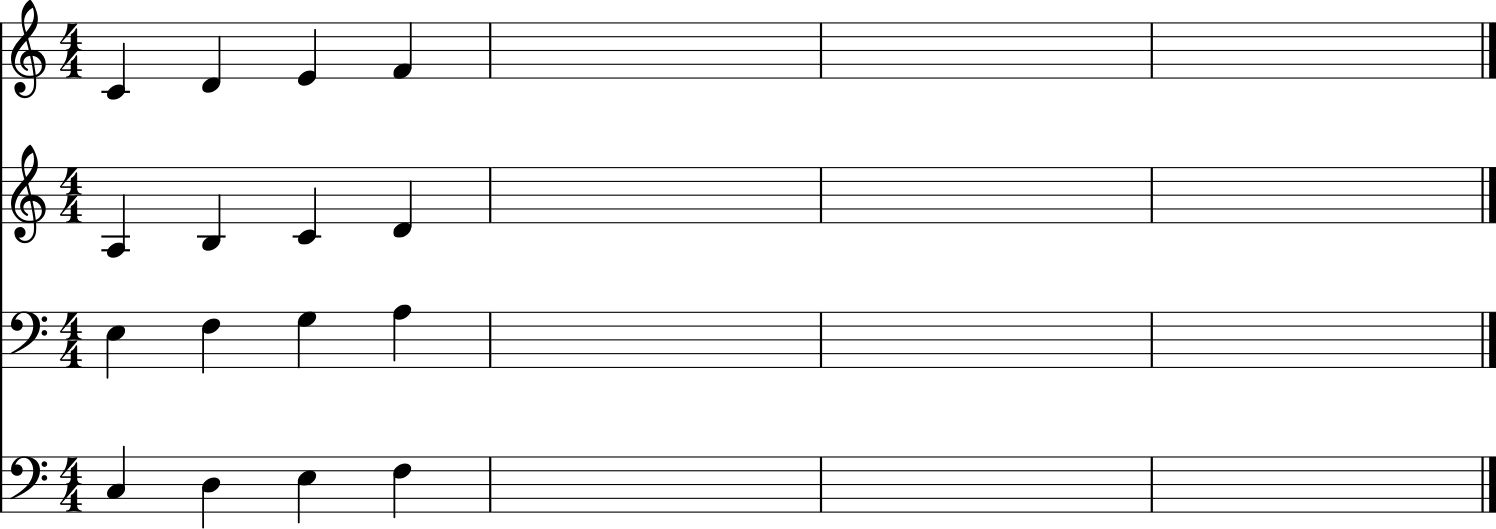

Soprano: C4 - D4 - C4 - A3
C4
D4
C4
A3
Alto: E4 - B3 - C4 - A3
E4
B3
C4
A3
Tenor: G3 - G3 - A3 - F3
G3
G3
A3
F3
Bass: C3 - G2 - A2 - F2
C3
G2
A2
F2
[<music21.note.Note C>, <music21.note.Note D>, <music21.note.Note C>, <music21.note.Note A>]
[<music21.note.Note E>, <music21.note.Note B>, <music21.note.Note C>, <music21.note.Note A>]
[<music21.note.Note G>, <music21.note.Note G>, <music21.note.Note A>, <music21.note.Note F>]
[<music21.note.Note C>, <music21.note.Note G>, <music21.note.Note A>, <music21.note.Note F>]
<music21.chord.Chord C4 E4 G3 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord D4 B3 G3 G2>
<music21.roman.RomanNumeral V in C major>
<music21.chord.Chord C4 C4 A3 A2>
<music21.roman.RomanNumeral vi in C major>
<music21.chord.Chord A3 A3 F3 F2>
<music21.roman.RomanNumeral IV in C major>
PAR5: PASS
PAR8: FAIL


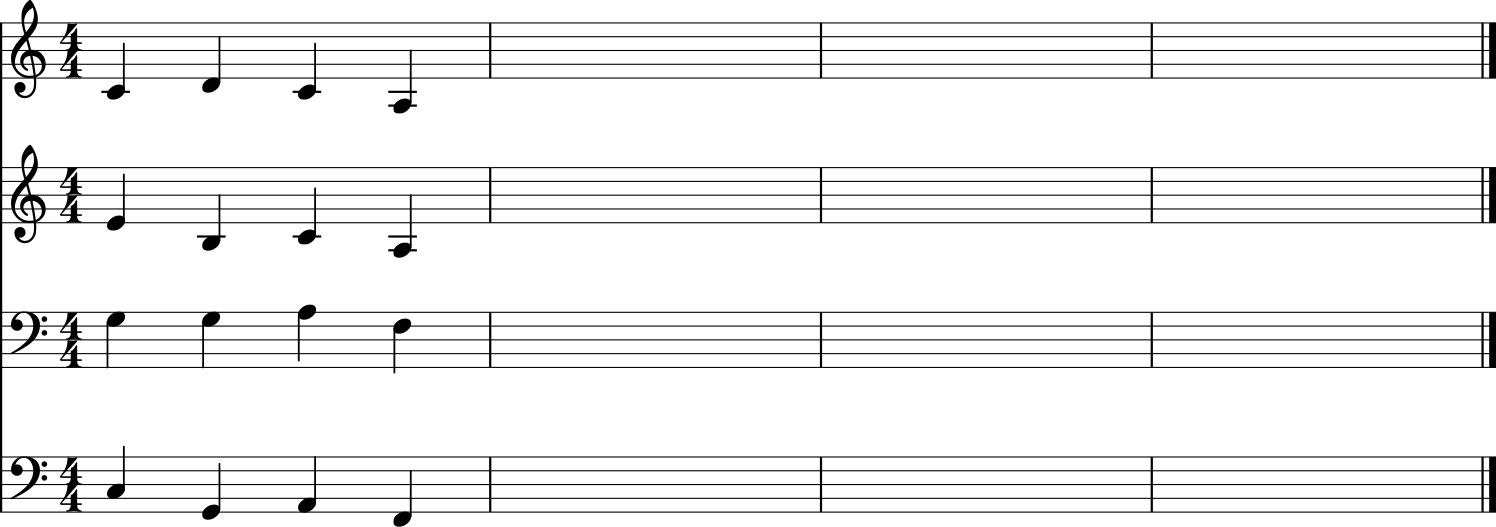

Soprano: E4 - F4 - G4 - C4
E4
F4
G4
C4
Alto: C4 - A3 - B3 - E4
C4
A3
B3
E4
Tenor: G3 - F3 - D4 - G3
G3
F3
D4
G3
Bass: C3 - F2 - G2 - C3
C3
F2
G2
C3
[<music21.note.Note E>, <music21.note.Note F>, <music21.note.Note G>, <music21.note.Note C>]
[<music21.note.Note C>, <music21.note.Note A>, <music21.note.Note B>, <music21.note.Note E>]
[<music21.note.Note G>, <music21.note.Note F>, <music21.note.Note D>, <music21.note.Note G>]
[<music21.note.Note C>, <music21.note.Note F>, <music21.note.Note G>, <music21.note.Note C>]
<music21.chord.Chord E4 C4 G3 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord F4 A3 F3 F2>
<music21.roman.RomanNumeral IV in C major>
<music21.chord.Chord G4 B3 D4 G2>
<music21.roman.RomanNumeral V in C major>
<music21.chord.Chord C4 E4 G3 C3>
<music21.roman.RomanNumeral I in C major>
PAR5: PASS
PAR8: PASS


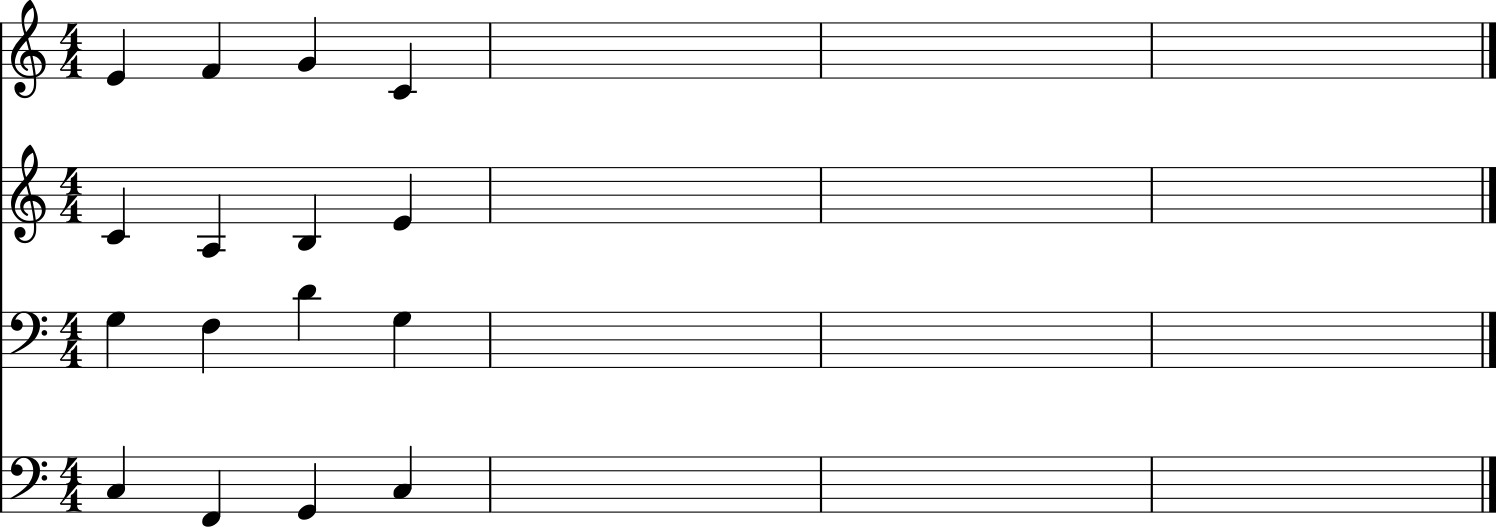

Soprano: E4 - F4 - D4 - C4
E4
F4
D4
C4
Alto: C4 - D4 - B3 - E4
C4
D4
B3
E4
Tenor: G3 - A3 - G3 - G3
G3
A3
G3
G3
Bass: C3 - D3 - G2 - C3
C3
D3
G2
C3
[<music21.note.Note E>, <music21.note.Note F>, <music21.note.Note D>, <music21.note.Note C>]
[<music21.note.Note C>, <music21.note.Note D>, <music21.note.Note B>, <music21.note.Note E>]
[<music21.note.Note G>, <music21.note.Note A>, <music21.note.Note G>, <music21.note.Note G>]
[<music21.note.Note C>, <music21.note.Note D>, <music21.note.Note G>, <music21.note.Note C>]
<music21.chord.Chord E4 C4 G3 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord F4 D4 A3 D3>
<music21.roman.RomanNumeral ii in C major>
<music21.chord.Chord D4 B3 G3 G2>
<music21.roman.RomanNumeral V in C major>
<music21.chord.Chord C4 E4 G3 C3>
<music21.roman.RomanNumeral I in C major>
PAR5: FAIL
PAR8: FAIL


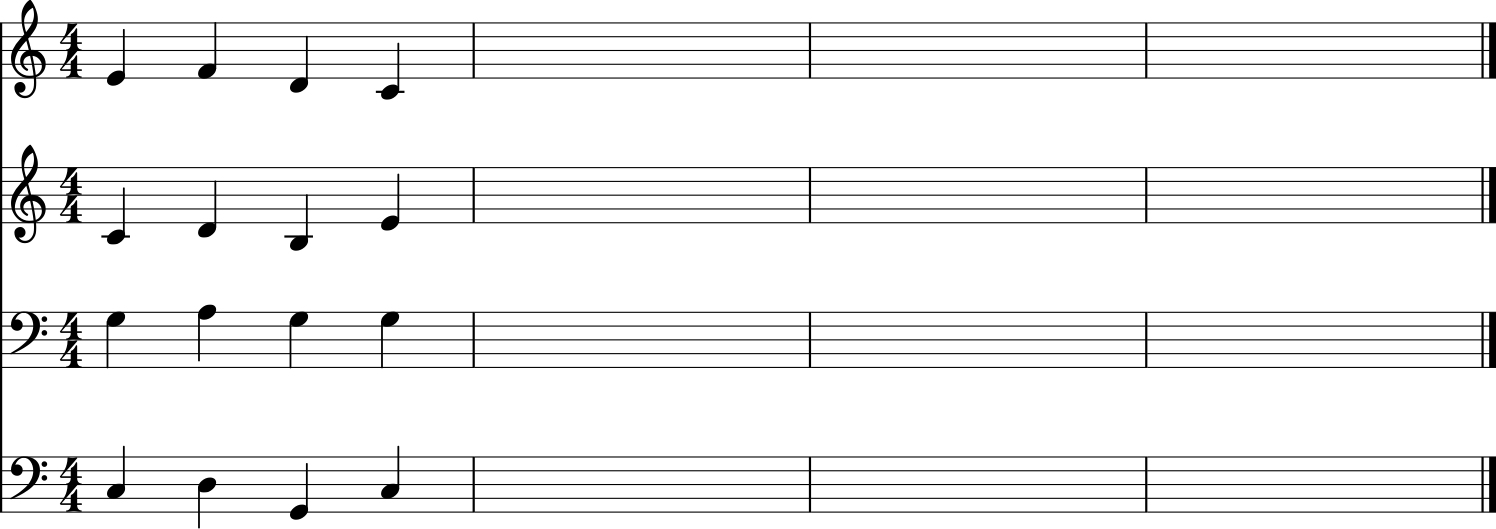

Soprano: C4 - C4 - A3 - B3
C4
C4
A3
B3
Alto: E4 - C4 - A3 - D4
E4
C4
A3
D4
Tenor: G3 - A3 - F3 - G3
G3
A3
F3
G3
Bass: C3 - A2 - F2 - G2
C3
A2
F2
G2
[<music21.note.Note C>, <music21.note.Note C>, <music21.note.Note A>, <music21.note.Note B>]
[<music21.note.Note E>, <music21.note.Note C>, <music21.note.Note A>, <music21.note.Note D>]
[<music21.note.Note G>, <music21.note.Note A>, <music21.note.Note F>, <music21.note.Note G>]
[<music21.note.Note C>, <music21.note.Note A>, <music21.note.Note F>, <music21.note.Note G>]
<music21.chord.Chord C4 E4 G3 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord C4 C4 A3 A2>
<music21.roman.RomanNumeral vi in C major>
<music21.chord.Chord A3 A3 F3 F2>
<music21.roman.RomanNumeral IV in C major>
<music21.chord.Chord B3 D4 G3 G2>
<music21.roman.RomanNumeral V in C major>
PAR5: PASS
PAR8: FAIL


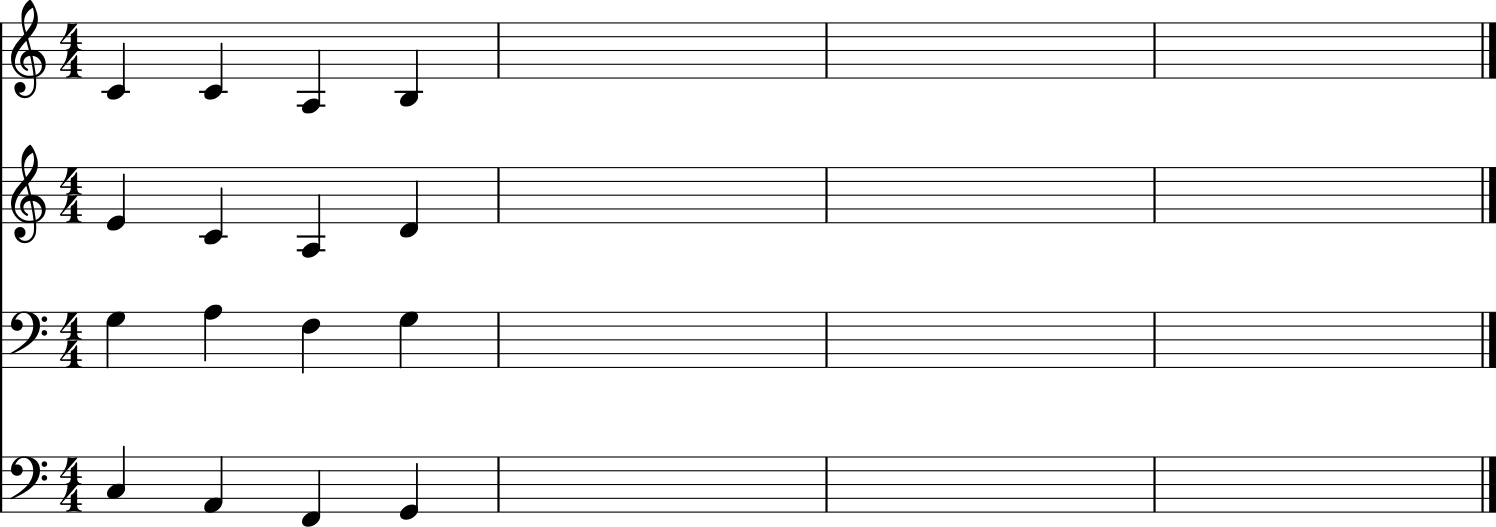

Soprano: C4 - B3 - C4 - G4
C4
B3
C4
G4
Alto: E4 - D4 - C4 - G3
E4
D4
C4
G3
Tenor: G3 - G3 - A3 - B3
G3
G3
A3
B3
Bass: C3 - G2 - A2 - E2
C3
G2
A2
E2
[<music21.note.Note C>, <music21.note.Note B>, <music21.note.Note C>, <music21.note.Note G>]
[<music21.note.Note E>, <music21.note.Note D>, <music21.note.Note C>, <music21.note.Note G>]
[<music21.note.Note G>, <music21.note.Note G>, <music21.note.Note A>, <music21.note.Note B>]
[<music21.note.Note C>, <music21.note.Note G>, <music21.note.Note A>, <music21.note.Note E>]
<music21.chord.Chord C4 E4 G3 C3>
<music21.roman.RomanNumeral I in C major>
<music21.chord.Chord B3 D4 G3 G2>
<music21.roman.RomanNumeral V in C major>
<music21.chord.Chord C4 C4 A3 A2>
<music21.roman.RomanNumeral vi in C major>
<music21.chord.Chord G4 G3 B3 E2>
<music21.roman.RomanNumeral iii in C major>
PAR5: PASS
PAR8: FAIL


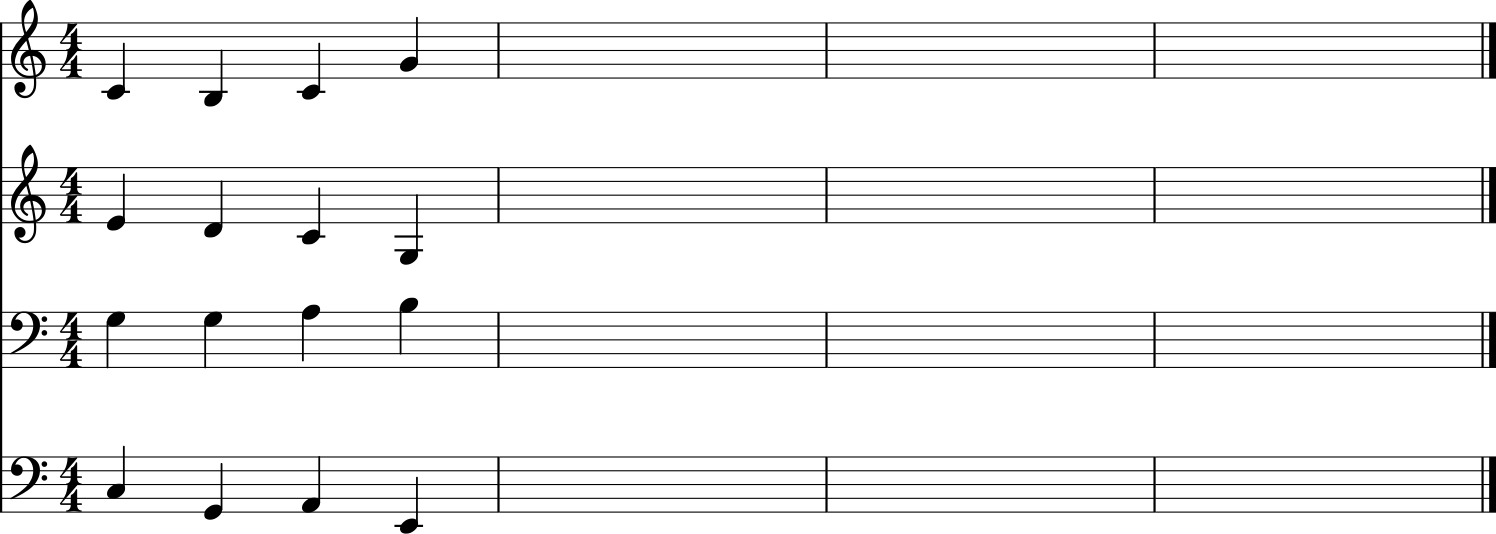

In [25]:
#
# Generate and Test all ChatGPT Inputs
#
for i in gpt_inputs:
  parts0 = create_parts_gpt(i)
  score0 = create_score_gpt(parts0)
  printScoreDetails(score0)
  checkFPH(score0)
  show_score(score0)